<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

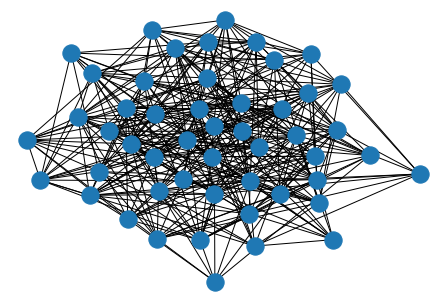

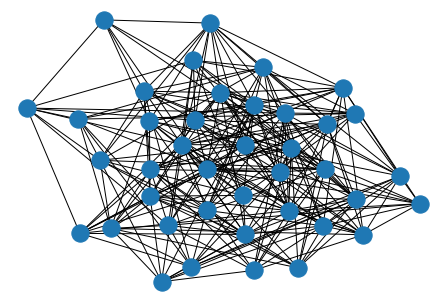

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[98081, 95292, 87727, 70672, 40981, 12223, 1209, 103, 32, 22, 20, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[1919, 4708, 12273, 29328, 57100, 83069, 86518, 70569, 40949, 12201, 1189, 85, 15, 5, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4708, 12273, 29328, 59019, 87777, 98791, 99897, 99968, 99978, 99980, 99982, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983]
[0.0, 1607.0, 3973.5, 10126.75, 23854.375, 49502.1875, 80241.09375, 97978.546875, 96266.2734375, 75560.13671875, 45892.068359375, 23745.0341796875, 11931.51708984375, 5974.758544921875, 2991.3792724609375, 1498.6896362304688, 750.3448181152344, 375.1724090576172, 187.5862045288086, 93.7931022644043, 46.89655113220215, 23.448275566101074, 11.724137783050537, 5.8620688915252686, 2.9310344457626343, 1.4655172228813171, 0.7327586114406586, 0.3663793057203293, 0.1831896528601

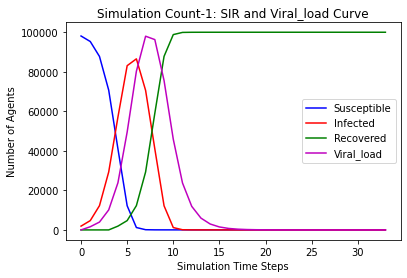

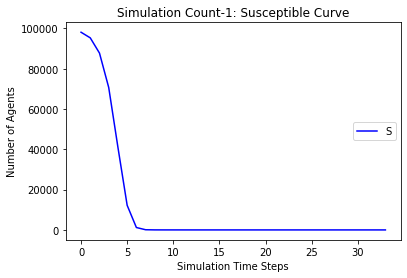

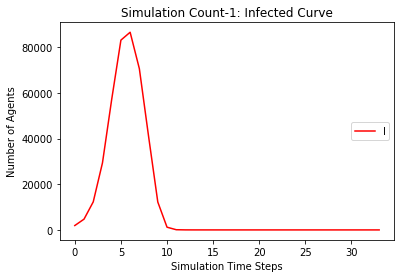

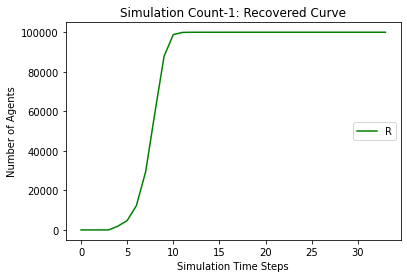

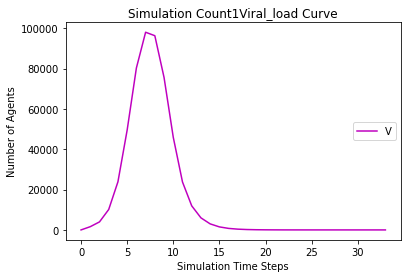

[98081, 95213, 87521, 69646, 40158, 11671, 1100, 85, 22, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[1919, 4787, 12479, 30354, 57923, 83542, 86421, 69561, 40136, 11655, 1084, 69, 6, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4787, 12479, 30354, 59842, 88329, 98900, 99915, 99978, 99984, 99984, 99984, 99984, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985]
[0.0, 1609.0, 4113.5, 10470.75, 24278.375, 49264.1875, 80148.09375, 97865.046875, 95574.5234375, 74767.26171875, 45233.630859375, 23391.8154296875, 11743.90771484375, 5877.953857421875, 2939.9769287109375, 1470.9884643554688, 736.4942321777344, 369.2471160888672, 184.6235580444336, 92.3117790222168, 46.1558895111084, 23.0779447555542, 11.5389723777771, 5.76948618888855, 2.884743094444275, 1.4423715472221375, 0.7211857736110687, 0.36059288680553436, 0.18029644340276718, 0.0

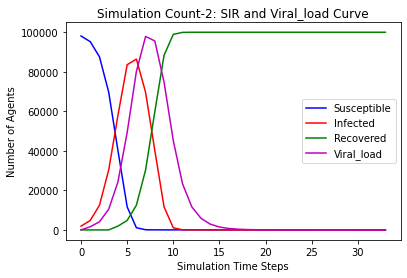

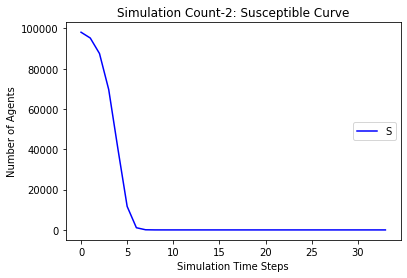

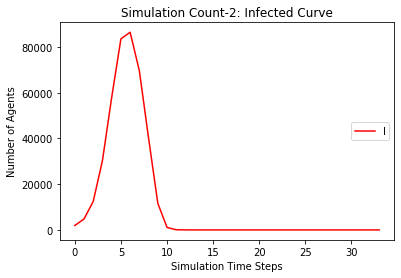

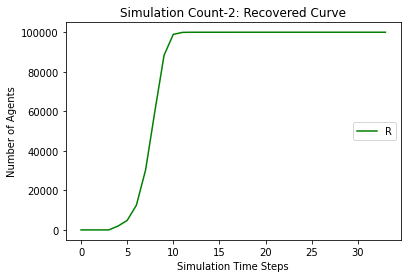

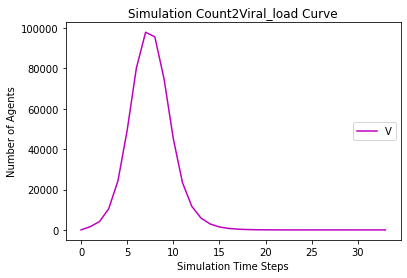

[98081, 95208, 87637, 70225, 40807, 11969, 1162, 105, 28, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[1919, 4792, 12363, 29775, 57274, 83239, 86475, 70120, 40779, 11949, 1145, 88, 11, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4792, 12363, 29775, 59193, 88031, 98838, 99895, 99972, 99980, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983]
[0.0, 1618.0, 4081.0, 10242.5, 24049.25, 49194.625, 79971.3125, 97891.65625, 95901.828125, 75173.9140625, 45651.95703125, 23675.978515625, 11901.9892578125, 5959.99462890625, 2982.997314453125, 1491.4986572265625, 745.7493286132812, 372.8746643066406, 186.4373321533203, 93.21866607666016, 46.60933303833008, 23.30466651916504, 11.65233325958252, 5.82616662979126, 2.91308331489563, 1.456541657447815, 0.7282708287239075, 0.36413541436195374, 0.18206770718097687, 0.091033853

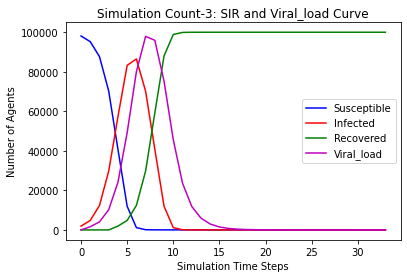

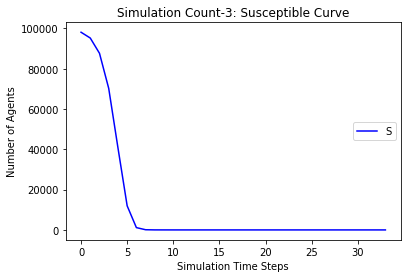

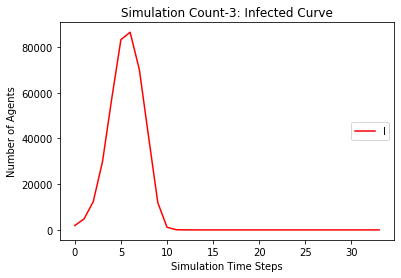

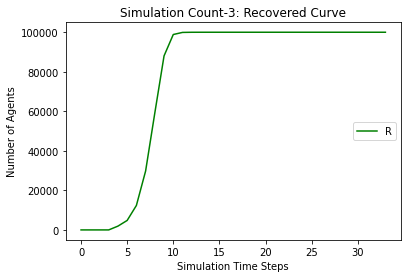

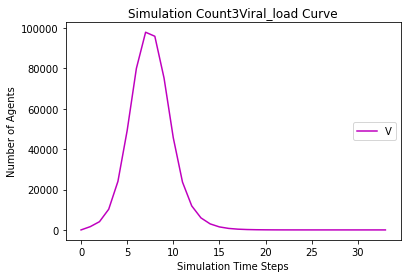

[98081, 95096, 87208, 69425, 39516, 11242, 1079, 93, 25, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[1919, 4904, 12792, 30575, 58565, 83854, 86129, 69332, 39491, 11225, 1062, 76, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4904, 12792, 30575, 60484, 88758, 98921, 99907, 99975, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983]
[0.0, 1652.0, 4125.0, 10620.5, 24897.25, 50985.625, 81579.8125, 98357.90625, 95711.953125, 74305.9765625, 44722.98828125, 23151.494140625, 11627.7470703125, 5818.87353515625, 2909.436767578125, 1454.7183837890625, 727.3591918945312, 363.6795959472656, 181.8397979736328, 90.9198989868164, 45.4599494934082, 22.7299747467041, 11.36498737335205, 5.682493686676025, 2.8412468433380127, 1.4206234216690063, 0.7103117108345032, 0.3551558554172516, 0.1775779277086258, 0.088788963854

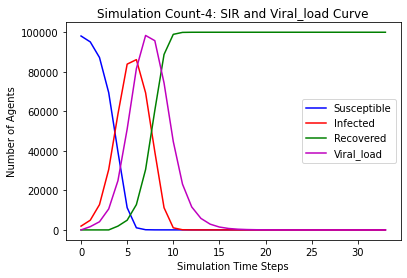

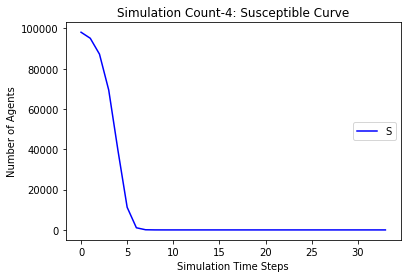

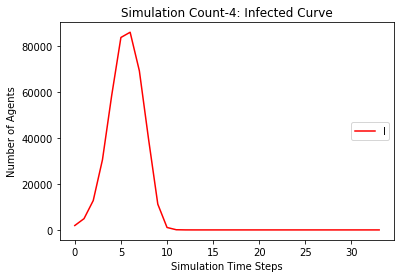

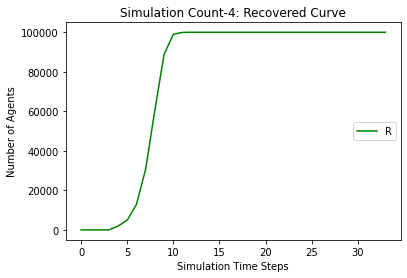

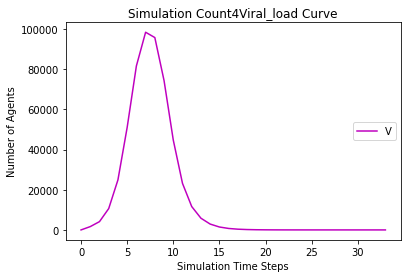

[98081, 95099, 87327, 69678, 39819, 11324, 1000, 73, 23, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[1919, 4901, 12673, 30322, 58262, 83775, 86327, 69605, 39796, 11307, 983, 56, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4901, 12673, 30322, 60181, 88676, 99000, 99927, 99977, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983, 99983]
[0.0, 1615.0, 4202.5, 10567.25, 24714.625, 50311.3125, 81288.65625, 98524.328125, 95733.1640625, 74610.58203125, 44887.291015625, 23155.6455078125, 11611.82275390625, 5809.911376953125, 2904.9556884765625, 1452.4778442382812, 726.2389221191406, 363.1194610595703, 181.55973052978516, 90.77986526489258, 45.38993263244629, 22.694966316223145, 11.347483158111572, 5.673741579055786, 2.836870789527893, 1.4184353947639465, 0.7092176973819733, 0.35460884869098663, 0.177304424345493

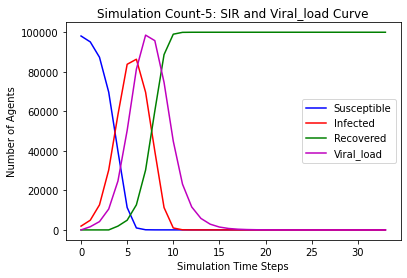

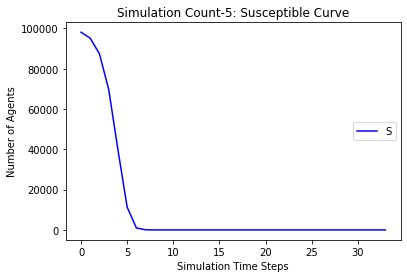

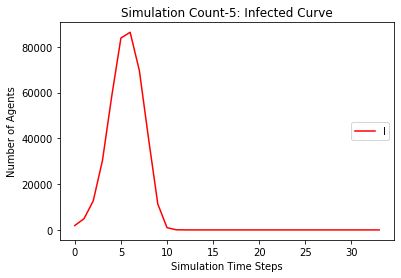

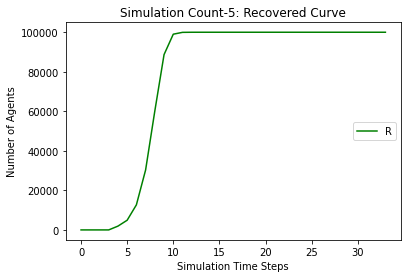

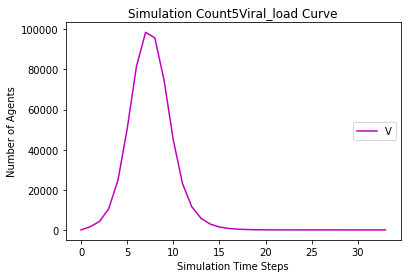

[98081, 95200, 87533, 70064, 40748, 11997, 1145, 93, 21, 17, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[1919, 4800, 12467, 29936, 57333, 83203, 86388, 69971, 40727, 11980, 1129, 78, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4800, 12467, 29936, 59252, 88003, 98855, 99907, 99979, 99983, 99984, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985]
[0.0, 1622.0, 4091.0, 10364.5, 23588.25, 48403.125, 79855.5625, 97824.78125, 95561.390625, 74972.6953125, 45505.34765625, 23571.673828125, 11840.8369140625, 5924.41845703125, 2964.209228515625, 1482.1046142578125, 741.0523071289062, 370.5261535644531, 185.26307678222656, 92.63153839111328, 46.31576919555664, 23.15788459777832, 11.57894229888916, 5.78947114944458, 2.89473557472229, 1.447367787361145, 0.7236838936805725, 0.36184194684028625, 0.18092097342014313, 0.0904604867

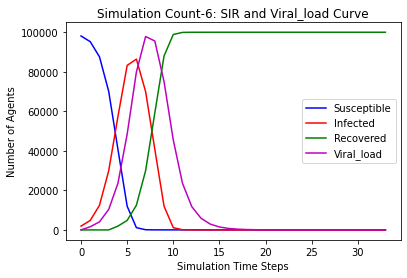

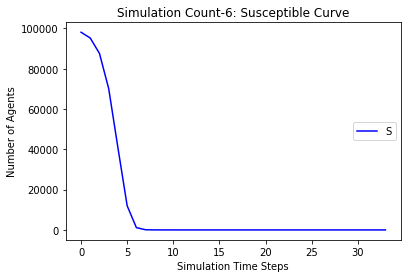

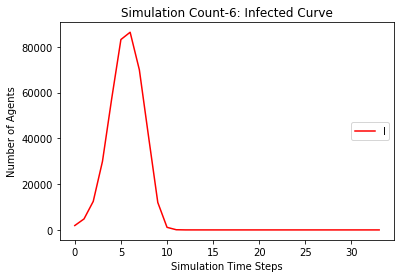

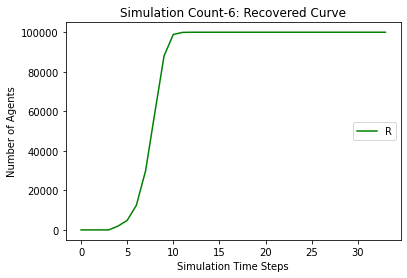

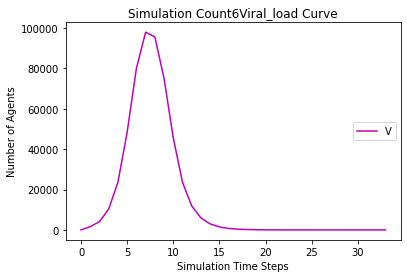

[98081, 95208, 87494, 70054, 40562, 11872, 1173, 81, 29, 19, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[1919, 4792, 12506, 29946, 57519, 83336, 86321, 69973, 40533, 11853, 1158, 66, 14, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4792, 12506, 29946, 59438, 88128, 98827, 99919, 99971, 99981, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985]
[0.0, 1622.0, 4026.0, 10326.0, 24120.0, 49546.0, 80035.0, 97941.5, 95949.75, 74955.875, 45428.9375, 23525.46875, 11810.734375, 5916.3671875, 2961.18359375, 1480.591796875, 740.2958984375, 370.14794921875, 185.073974609375, 92.5369873046875, 46.26849365234375, 23.134246826171875, 11.567123413085938, 5.783561706542969, 2.8917808532714844, 1.4458904266357422, 0.7229452133178711, 0.36147260665893555, 0.18073630332946777, 0.09036815166473389, 0.04518407583236694, 0.02259203791

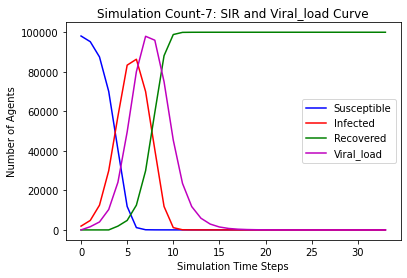

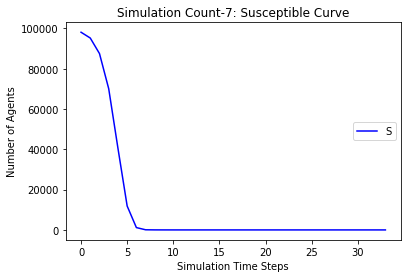

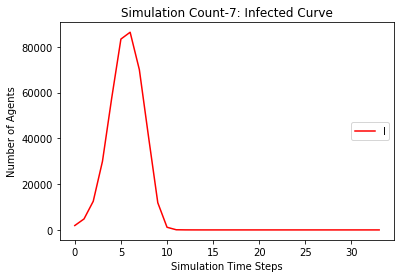

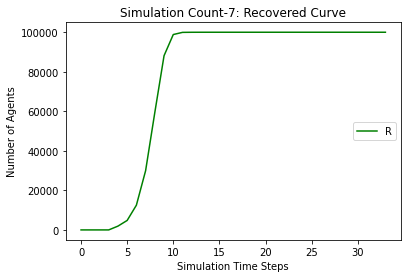

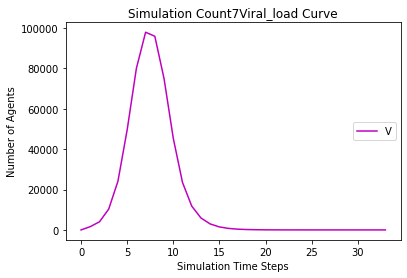

[98081, 95261, 87552, 70161, 40013, 11493, 1099, 89, 22, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
[1919, 4739, 12448, 29839, 58068, 83768, 86453, 70072, 39991, 11478, 1085, 75, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4739, 12448, 29839, 59987, 88507, 98901, 99911, 99978, 99985, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986, 99986]
[0.0, 1628.0, 4022.0, 10409.0, 24714.5, 50876.25, 81081.125, 98188.5625, 96050.28125, 74903.140625, 45033.5703125, 23275.78515625, 11695.892578125, 5850.9462890625, 2925.47314453125, 1462.736572265625, 731.3682861328125, 365.68414306640625, 182.84207153320312, 91.42103576660156, 45.71051788330078, 22.85525894165039, 11.427629470825195, 5.713814735412598, 2.856907367706299, 1.4284536838531494, 0.7142268419265747, 0.35711342096328735, 0.17855671048164368, 0.08927835524082184

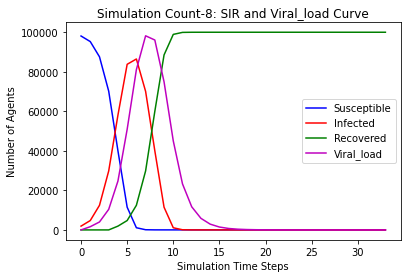

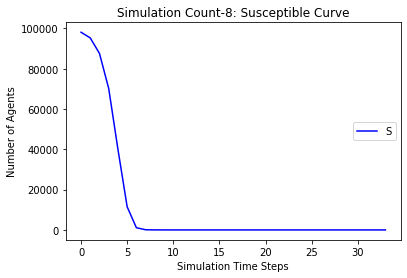

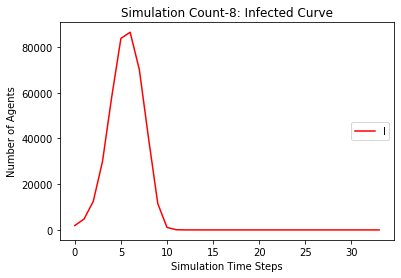

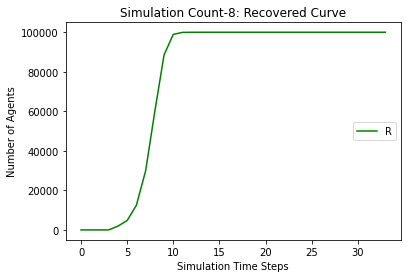

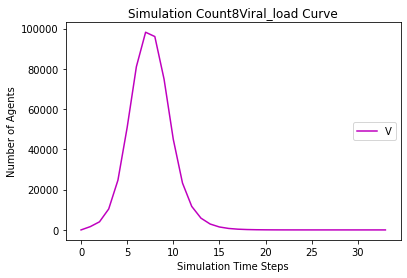

[98081, 95159, 87318, 69439, 39497, 11329, 1063, 81, 23, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[1919, 4841, 12682, 30561, 58584, 83830, 86255, 69358, 39474, 11314, 1048, 66, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4841, 12682, 30561, 60503, 88671, 98937, 99919, 99977, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985, 99985]
[0.0, 1619.0, 4106.5, 10799.25, 25050.625, 50293.3125, 81062.65625, 98301.328125, 95317.6640625, 73958.83203125, 44541.416015625, 23006.7080078125, 11549.35400390625, 5778.677001953125, 2889.3385009765625, 1444.6692504882812, 722.3346252441406, 361.1673126220703, 180.58365631103516, 90.29182815551758, 45.14591407775879, 22.572957038879395, 11.286478519439697, 5.643239259719849, 2.8216196298599243, 1.4108098149299622, 0.7054049074649811, 0.35270245373249054, 0.1763512268662

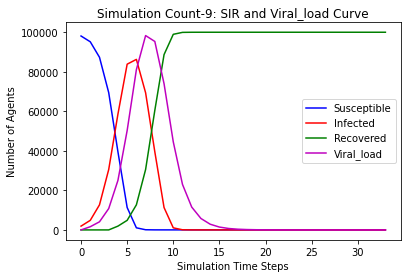

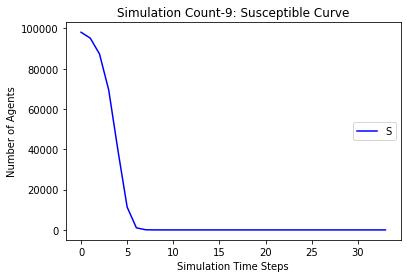

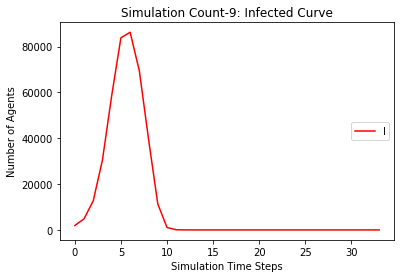

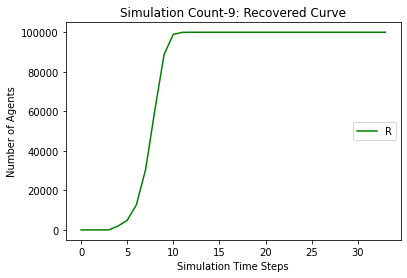

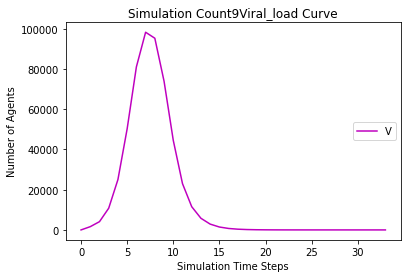

[98081, 95099, 87336, 69585, 39623, 11456, 1107, 89, 24, 21, 21, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
[1919, 4901, 12664, 30415, 58458, 83643, 86229, 69496, 39599, 11435, 1086, 69, 4, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1919, 4901, 12664, 30415, 60377, 88544, 98893, 99911, 99976, 99979, 99979, 99980, 99980, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981, 99981]
[0.0, 1646.0, 4110.0, 10767.0, 25112.5, 49944.25, 80800.125, 97942.0625, 95534.03125, 74392.015625, 44852.0078125, 23197.00390625, 11651.501953125, 5829.7509765625, 2916.87548828125, 1459.437744140625, 729.7188720703125, 364.85943603515625, 182.42971801757812, 91.21485900878906, 45.60742950439453, 22.803714752197266, 11.401857376098633, 5.700928688049316, 2.850464344024658, 1.425232172012329, 0.7126160860061646, 0.3563080430030823, 0.17815402150154114, 0.08907701075077057,

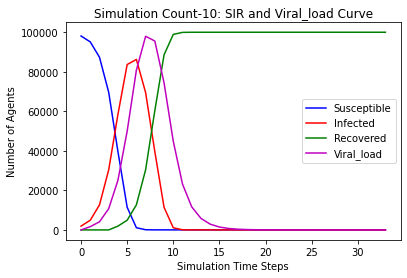

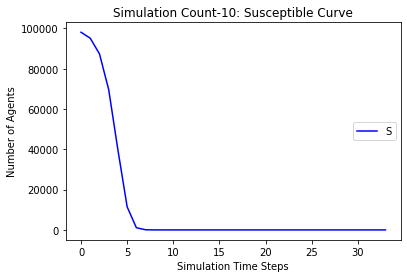

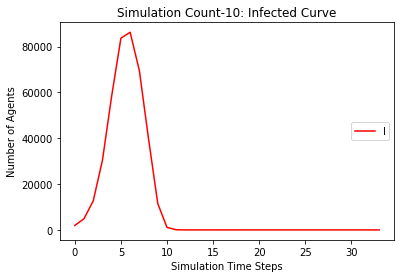

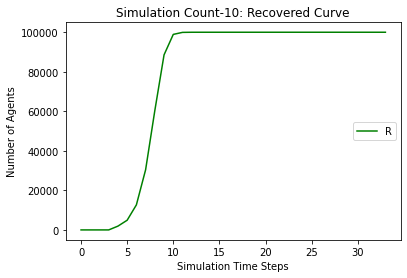

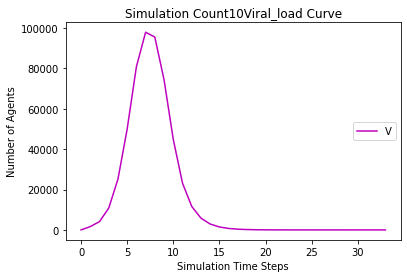

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

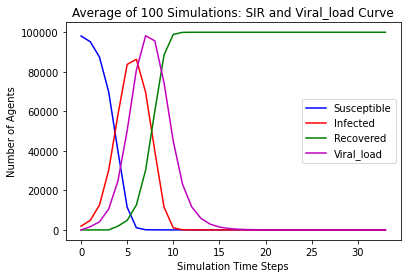

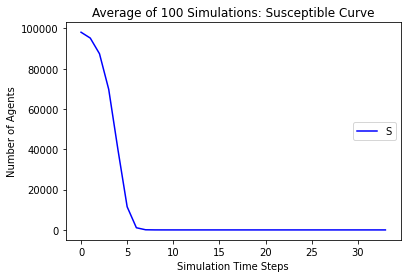

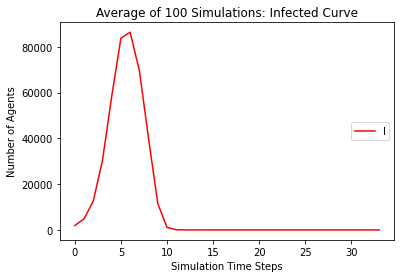

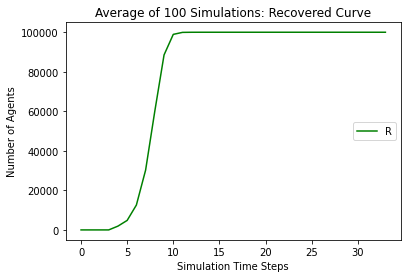

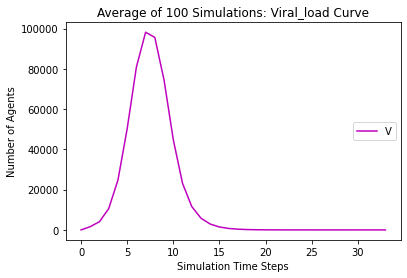

In [12]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Viral_load"),loc='center right')
plt.show()  


  
